In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('ggplot')    #graph style

In [170]:
# getting data from source
df = web.DataReader('AMZN', data_source = 'yahoo', start = '2015-01-01', end = '2019-12-30')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,312.980011,310.010010,311.549988,310.350006,2048000,310.350006
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013
...,...,...,...,...,...,...
2019-12-23,1793.000000,1784.510010,1788.260010,1793.000000,2136400,1793.000000
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020


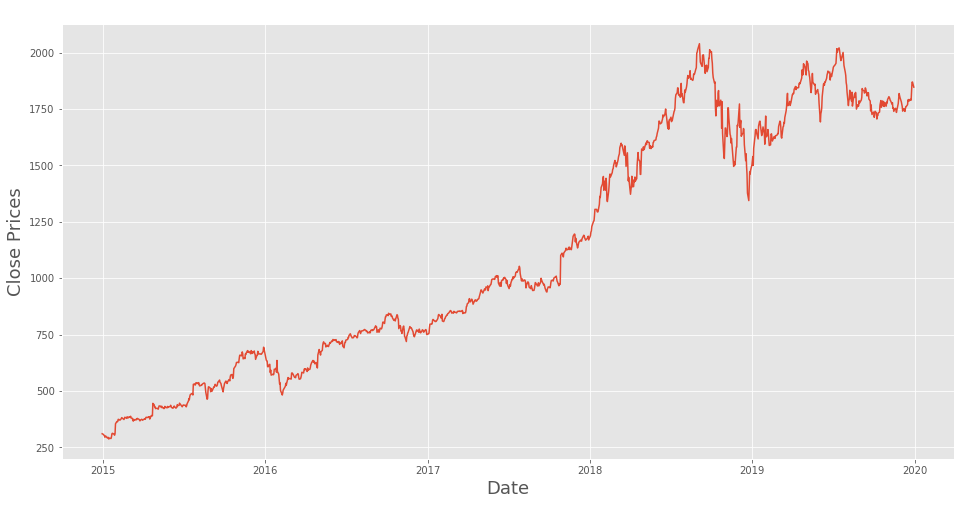

In [171]:
# plotting graph
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])  #plotting close price column
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Prices', fontsize = 18)
plt.show() 

In [174]:
data = df.filter(['Close'])  #filtering only close price column
dataset = data.values   #converting to numpy array
training_data_len =  math.ceil(len(dataset) * 0.8)  #using 80% of the data
training_data_len


1007

In [173]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))   #converts all the values b/w 0 and 1
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01335189],
       [0.0123077 ],
       [0.00869585],
       ...,
       [0.90257681],
       [0.90316454],
       [0.89009221]])

In [172]:
train_data = scaled_data[0:training_data_len, :]  #creating scaled training dataset
x_train = []
y_train = []

for i in range(60,len(train_data)):   #splitting data into 2 datasets 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])  
    if i<=60:
        print(x_train)
        print(y_train)
        print()
    

[array([0.01335189, 0.0123077 , 0.00869585, 0.00475875, 0.00654471,
       0.00770871, 0.00569452, 0.00254484, 0.00444491, 0.00360614,
       0.        , 0.00216254, 0.00142077, 0.00587711, 0.01333478,
       0.01451591, 0.01295818, 0.01129775, 0.00967727, 0.01416784,
       0.03856073, 0.04423243, 0.04370748, 0.0443922 , 0.04960743,
       0.04982996, 0.04770735, 0.0490996 , 0.05032068, 0.05147898,
       0.05413793, 0.05048613, 0.04931071, 0.05252316, 0.05518213,
       0.05317364, 0.05228921, 0.05615784, 0.0558326 , 0.05318505,
       0.05632332, 0.05572418, 0.05464577, 0.0575615 , 0.0531451 ,
       0.0522721 , 0.04710823, 0.04531656, 0.04980713, 0.04771875,
       0.04929931, 0.04848336, 0.05032068, 0.04923653, 0.05223215,
       0.05030354, 0.04972154, 0.04793558, 0.04587574, 0.04770735])]
[0.05000683814131693]



In [144]:
x_train, y_train = np.array(x_train), np.array(y_train)   #convert to numpy array

In [145]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

In [146]:
#building the LSTM
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [147]:
model.compile(optimizer = 'adam' , loss ='mean_squared_error' )

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
158/947 [====>.........................] - ETA: 1:38 - loss: 0.0072

In [ ]:
#testing dataset
test_data = scaled_data[training_data_len - 60: , :]
#create data sets
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [ ]:
x_test = np.array(x_test)    #convert to numpy


In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))   #reshape data

In [ ]:
#get predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get root mean squared error(to check performance)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse


In [ ]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'val', 'predictions'],loc = 'lower right')
plt.show()

In [ ]:
#show valid and predicted prices
valid

In [175]:
ap_ple = web.DataReader('AMZN', data_source = 'yahoo', start = '2015-01-01', end ='2020-02-15')
new_df = ap_ple.filter(['Close'])
#get last 60 day cp
last_60 = new_df[-60:].values   #converting to array
#scale data
last_60_scaled = scaler.transform(last_60)
#create empty lest
X_test = []
#append past 60 to X_test
X_test.append(last_60_scaled)
#convert to numpy
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#predicted scale price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2028.1727]]


In [176]:
ap_ple2 = web.DataReader('AMZN', data_source = 'yahoo', start = '2020-02-12', end ='2020-02-12')
print(ap_ple2['Close'])

Date
2020-02-11    2150.800049
2020-02-12    2160.000000
Name: Close, dtype: float64
